In [14]:
import random
import timeit
import matplotlib.pyplot as plt

In [15]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])

    right = merge_sort(arr[mid:])
    
    return merge(left, right)

In [16]:

def merge(left, right):
    merged = []
    i=j=0
    while i< len(left) and j < len(right):
        if left[i] < right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j+= 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

In [17]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [18]:
def generate_data(size):
    return [random.randint(0,100000) for _ in range(size)]

In [19]:
def measure_time(func, arr):
    timer = timeit.Timer(lambda: func(arr.copy()))
    return timer.timeit(number=1)

sizes=[100, 1000, 10000]
results={"merge_sort":[], "insertion_sort":[], "timsort":[]}

In [20]:

for size in sizes:
    data = generate_data(size)

    merge_sort_time=measure_time(merge_sort, data)
    results["merge_sort"].append(merge_sort_time)

    insertion_sort_time=measure_time(insertion_sort, data)
    results["insertion_sort"].append(insertion_sort_time)

    timsort_time=measure_time (sorted, data)
    results["timsort"].append(timsort_time)

print(results)

{'merge_sort': [0.0007271000649780035, 0.01025010016746819, 0.19415379990823567], 'insertion_sort': [0.000830099917948246, 0.3845407001208514, 16.209258100017905], 'timsort': [3.260001540184021e-05, 0.0005403000395745039, 0.005605699960142374]}


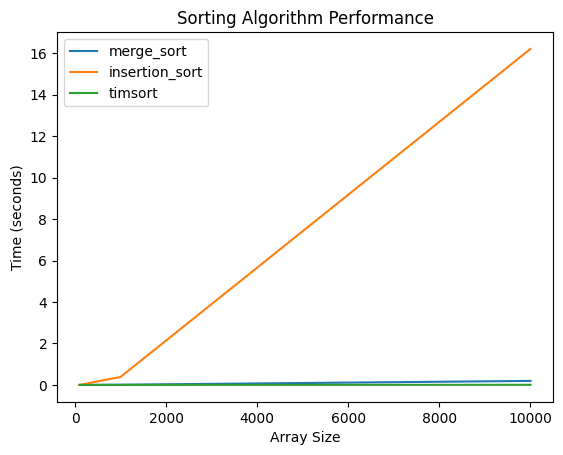

In [21]:

def plot_results(results, sizes):
    for algorithm, times in results.items():
        plt.plot(sizes, times, label=algorithm)
    plt.xlabel("Array Size")
    plt.ylabel("Time (seconds)")
    plt.title("Sorting Algorithm Performance")
    plt.legend()
    plt.show()

plot_results(results, sizes)